In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Import data
df = pd.read_csv('./files/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
sex            70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# Add 'overweight' column
bmi = df['weight'] / ( (df['height'] / 100.) ** 2 )
df['overweight'] = ( bmi > 25 ) * 1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
# mask = (~(( df['cholesterol'] == 1) | (df['gluc'] == 1 ))) * 1
# mask.value_counts()
df['cholesterol'] = (df['cholesterol'] > 1 ) * 1
df['gluc'] = (df['gluc'] > 1 ) * 1
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [6]:
df['cardio'].value_counts()	

0    35021
1    34979
Name: cardio, dtype: int64

### draw_cat_plot

In [15]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat.head()


,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [31]:
df_cardio = df_cat[ df_cat['cardio']==0 ]
# df_cardio = df_cardio.drop(['cardio'], axis=1)
val0 = (df_cardio[ df_cardio['value']==0 ])['variable'].value_counts()
val1 = (df_cardio[ df_cardio['value']==1 ])['variable'].value_counts()
val01 = pd.concat([val0,val1], axis=1, sort=False)
val01
# df_cat[['variable','value']]
# val0,val1


,variable,variable
alco,33080,1941
smoke,31781,3240
gluc,30894,4127
cholesterol,29330,5691
overweight,15915,19106
active,6378,28643


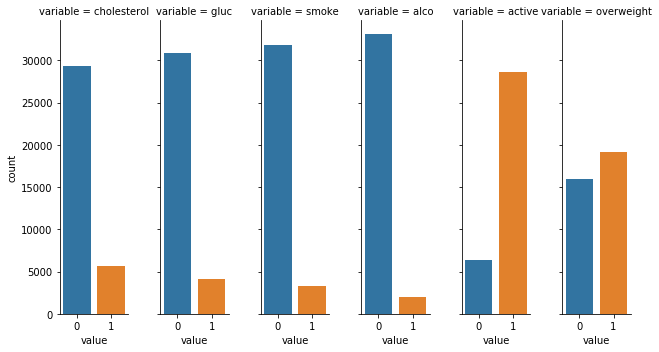

In [40]:
df_cardio.head()
sns.catplot(x='value',  kind='count', col='variable', data=df_cardio, aspect=.3, sharey=True)


### draw_heat_map

In [10]:
mask_ap = (df['ap_lo'] <= df['ap_hi']) * 1
mask_height_lo = (df['height'] >= df['height'].quantile(0.025)) * 1
mask_height_hi = (df['height'] <= df['height'].quantile(0.975)) * 1
mask_weight_lo = (df['weight'] >= df['weight'].quantile(0.025)) * 1
mask_weight_hi = (df['weight'] <= df['weight'].quantile(0.975)) * 1
mask = (mask_ap * mask_height_lo * mask_height_hi * mask_weight_lo * mask_weight_hi)
print(mask.value_counts())

drop_list = []
for i, m in enumerate(mask.to_list()):
    if m == 0:
        drop_list.append(i)
# len(drop_list)
df_heat = df.drop(drop_list, axis=0)
df_heat.shape


1    63259
0     6741
dtype: int64


(63259, 14)

In [11]:
df_cat = None
